In [2]:
import numpy as np
from matplotlib import pyplot as plt

Lets take an example of a polynomial function y = a3*(x^3) + a2*(x^2) + a1*x + a0. We observe y which is accompanied by a random noise in measurements. Our task is to use polynomial regression to see if we can identify this underlying law by filtering out the undesirable noise.

In [190]:
n = 500
a3 = 1
a2 = 2
a1 = -2
a0 = 0.8
x = 6*(np.random.rand(n,1)-0.5)
y = a3*(x**3) + a2*(x**2) + a1*x+ a0 + 3*np.random.randn(n,1)

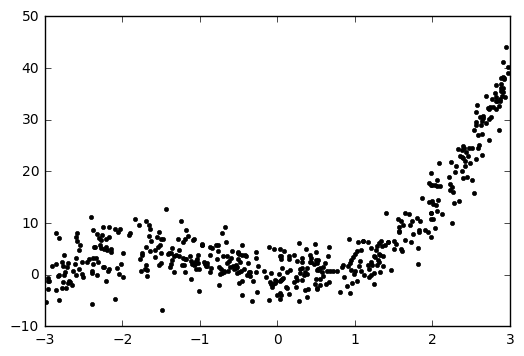

In [191]:
plt.plot(x, y,'k.')
plt.show()

First attempt to fit a linear model into this data. The model will identify an overall increasing trend in the data, but cannot identify the curvture.

In [192]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
a = lin_reg.coef_[0][0]
b = lin_reg.intercept_[0]
print (a, b, lin_reg.score(x, y))

3.9631889775586395 7.021171647768633 0.4342597275442015


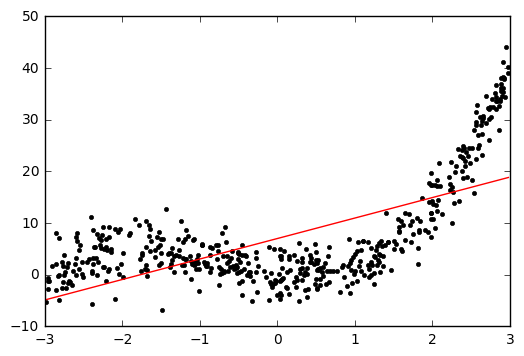

In [193]:
y_lin = lin_reg.predict(x)
plt.plot(x, y, 'k.')
s = np.c_[x,y_lin]
s = s[np.argsort(s[:,0])]
plt.plot(s[:,0],s[:,1],'r-')
plt.show()

Now lets try fitting a second order polynomial, also known as a parabola. A parabola has one known point of minimum or maximum.

In [194]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
x_poly2 = poly_feat.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly2, y)
aa1 = lin_reg.coef_[0][0]
aa2 = lin_reg.coef_[0][1]
bb = lin_reg.intercept_[0]
print (aa2, aa1, bb, lin_reg.score(x_poly2, y))

2.2035459727260354 3.6344134408959565 0.423849811813648 0.7781127672510365


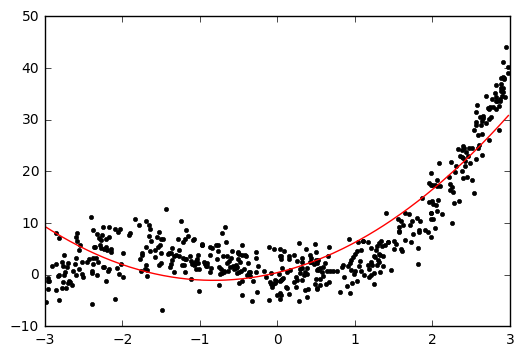

In [195]:
y_poly2 = lin_reg.predict(x_poly2)
plt.plot(x, y, 'k.')
ss = np.c_[x, y_poly2]
ss = ss[np.argsort(ss[:,0])]
plt.plot(ss[:,0],ss[:,1],'r-')
plt.show()

A cubic must fit the data better since it was generated out of a 3rd degree polynomial. And as we see it does perform much better with an Rsquared of 95%

In [196]:
poly_feat = PolynomialFeatures(degree=3, include_bias=False)
x_poly3 = poly_feat.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly3, y)
aaa1 = lin_reg.coef_[0][0]
aaa2 = lin_reg.coef_[0][1]
aaa3 = lin_reg.coef_[0][2]
bbb = lin_reg.intercept_[0]
print (aaa3, aaa2, aaa1, bbb, lin_reg.score(x_poly3, y))

0.95746332044364 2.091808582965221 -1.6892306596313738 0.5502557066422185 0.9167963900769514


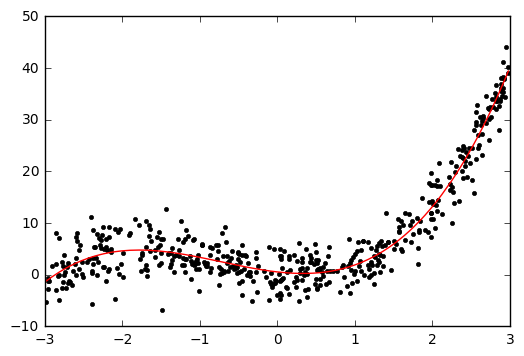

In [197]:
y_poly3 = lin_reg.predict(x_poly3)
plt.plot(x, y, 'k.')
sss = np.c_[x,y_poly3]
sss = sss[np.argsort(sss[:,0])]
plt.plot(sss[:,0],sss[:,1],'r-')
plt.show()

But what happens if we continue fitting a higher and higher order polynomial. In this example we kno apriori that the underlying law is a cubic. But that wont be the case in practice. Even though cubic polynomial regression performs substantially better than a quadratic and certainly better than a linear model, it cannot fit all the data points observed because of the noise. 

But a higher degree polynomial may be much better in fitting with the noise as well. Lets try one with 25 degree polynomial.
We see some improvement in the Rsquared value.

In [198]:
poly_feat = PolynomialFeatures(degree=25, include_bias=False)
x_polyn = poly_feat.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_polyn, y)
print (lin_reg.score(x_polyn, y))

0.9193969230754344


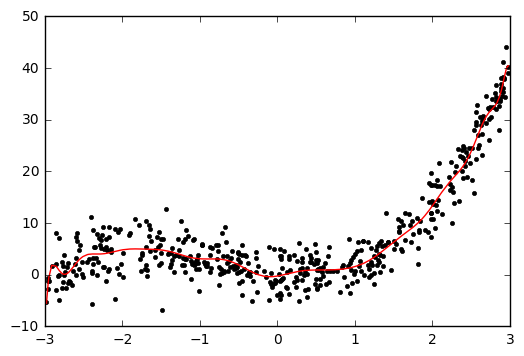

In [199]:
y_polyn = lin_reg.predict(x_polyn)
plt.plot(x, y, 'k.')
s_n = np.c_[x,y_polyn]
s_n = s_n[np.argsort(s_n[:,0])]
plt.plot(s_n[:,0],s_n[:,1],'r-')
plt.show()

However does that really mean that the underying law is infact a 25 degree polynomial? The accompanying noise makes the data incomprehensible and unpredictable. Noise is nature's way of hiding its true behaviour. But we must find a way to avoid the entrapments of noise and fall prey to the menace of overfitting. 

An overfit model is a bad model, and a bad model can be identified by its predictions. An overfit model will try to emulate the noise into its predictions. As a result, the predictions will be all over the place and will seldom match the true observations in the future, because noise is by definition unpredictable. A good model, on the other hand, make its peace with the noise. It is an admission that noise will always be there, but it will not change the underlying nature. A good model will perform much in predictions in general. 

However, given what we already have observed, can we test our models on the current data set to analyse their performance? This technique is known as cross-validation. We can 'train' our model only on a subset of the data, while using the remaining data to 'test' how well the model predicts the observations.

In [200]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.cross_validation import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_err, val_err = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_pred = model.predict(x_train[:m])
        y_val_pred = model.predict(x_val[:m])
        train_err.append(MSE(y_train[:m], y_train_pred))
        val_err.append(MSE(y_val[:m], y_val_pred))
    plt.plot(np.sqrt(train_err), 'b-', label='training')
    plt.plot(np.sqrt(val_err), 'r-', label='validation')
    plt.xlabel('training set size')
    plt.ylabel('RMSE')
    plt.legend(loc='upper right')
    plt.ylim((0,10))
    plt.show()

Our perfomance metric is the Root Mean Squared Error (RMSE), which is a sort of an average estimate of how much the model deviates from the actual observations. The goal of any regression algorithm, is that given a model, to find the model parameters which minimize the RMSE on the training set. Since there is significant noise in our observations, the RMSE may never go down to 0. However, as we discussed earlier, this is something we will have to learn to live with. We, on the other hand, will try to minimize the RMSE on the test set, as that shows the performance of the model on data which is yet unknown to it. 

Not only that, we also want the model to show some amount of stability/ tractability. We hope that the RMSE is around the same value for both the training as well as the test set, such that we can be confident that the model does not behave very differently while under the training and test regimes. If it does behave differently, then most likely it is the training/ test data itself which exhibit different characteristics and are not quite similar. One reason for that is generally if data has not been split evenly/ randomly and there are different biases within the two sets, or indeed if the data sets themselves are too small for an accurate regression to take place.

We have used a method called train_test_split that ensures even split of the data. As for the size of the sets, lets see how that affects the model performances in case of different polynomials.

Linear regression RMSE


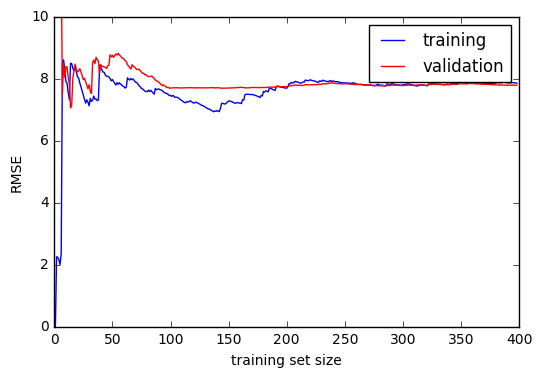

In [201]:
print ('Linear regression RMSE')
plot_learning_curves(lin_reg, x, y)

RMSE when regressed against a quadratic polynomial


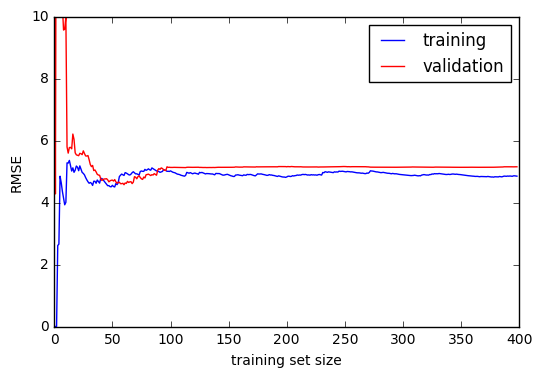

In [202]:
print ('RMSE when regressed against a quadratic polynomial')
plot_learning_curves(lin_reg, x_poly2, y)

RMSE when regressed against a cubic polynomial


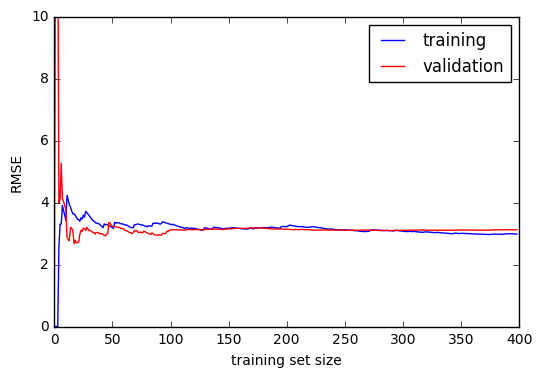

In [203]:
print ('RMSE when regressed against a cubic polynomial')
plot_learning_curves(lin_reg, x_poly3, y)

RMSE when regressed against a very high degree polynomial


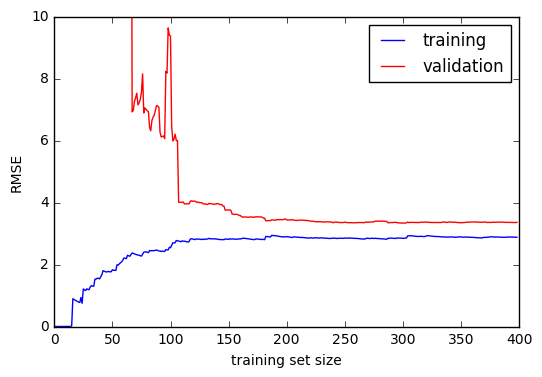

In [204]:
print ('RMSE when regressed against a very high degree polynomial')
plot_learning_curves(lin_reg, x_polyn, y)

Bias-Variance Tradeoff

We discussed earlier the problems which arise from an overfit model. An overfit model is generally a model having high variance which is when the model is exessively sensitive to noise and small variations in the data. A higher degree polynomial, or in general a more complex model with a large number of parameters, is usually more sensitive. In other words, very high degree polynomial models should be avoided in order to prevennt overfitting.
Nevertheless, this does not mean higher order polynomials are always bad. You cannot fit a linear model in the above data and call it a good model. Such a model will infact end up underfitting the data, since it lacks the sufficient amount of complexity that represents the underlying law. This is called model bias - errors arising out of wrong assumptions of the underlying law.

The 'perfect' model, would generally exist somewhere in between the two extremes. In order to find the same, one must trade-off some amount of bias, and gain a little bit of variance in the model, and vice versa. This is why bias-variance tradeoff is a common phenomena observed in regression and predictive modeling. While the effect of this tradeoff cannot be completely overcome, but it can always be reduced by obtaining more data or cleaner data by fixing the sources/ improving the measurement techniques/ instruments.